<a href="https://colab.research.google.com/github/Aspire-Mayank/EIP4/blob/master/Session2/Assignment2/Day_2_Neural_Network_Architecture_and_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Import Libraries and Modules**

In [1]:
#https://keras.io/
!pip install -q keras
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


###Load pre-Shuffled MNIST data into train and test sets

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


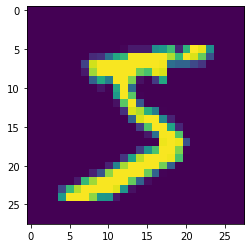

In [3]:
print(X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0],28, 28, 1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
#convert 1-Dimensional class arrays to 10-Dimensional class metrics
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
from keras.layers import Activation 
model = Sequential()

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu'))#24
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, 1, activation='relu'))#24
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))#12

model.add(Convolution2D(16, 3, 3, activation='relu'))#10
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu'))#8
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, 1, activation='relu'))#8
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))#4

model.add(Convolution2D(16, 3, 3, activation='relu'))#2
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 2, 2,))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/li

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_43 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_18 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_44 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 24, 24, 10)        330       
_________________________________________________________________
batch_normalization_45 (Batc (None, 24, 24, 10)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (2, 2))`


In [19]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=25, verbose=1,
          validation_data=(X_test, Y_test),
          callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/25

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 15s 253us/step - loss: 0.1963 - acc: 0.9417 - val_loss: 0.0710 - val_acc: 0.9760
Epoch 2/25

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 11s 182us/step - loss: 0.0566 - acc: 0.9827 - val_loss: 0.0405 - val_acc: 0.9869
Epoch 3/25

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 11s 183us/step - loss: 0.0435 - acc: 0.9863 - val_loss: 0.0354 - val_acc: 0.9884
Epoch 4/25

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 11s 183us/step - loss: 0.0362 - acc: 0.9878 - val_loss: 0.0269 - val_acc: 0.9917
Epoch 5/25

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [20]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.020625729440691794, 0.9945]


In [21]:
y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])

[[5.28290710e-11 1.07028635e-08 8.60327276e-09 3.63321662e-09
  1.98145014e-10 3.47639105e-11 2.49972365e-14 1.00000000e+00
  4.06237327e-12 6.56900923e-10]
 [5.60599256e-09 1.38385703e-08 1.00000000e+00 3.42882597e-11
  3.21836342e-11 7.72188303e-14 5.32513900e-09 3.78783420e-12
  4.13629492e-10 1.27779742e-12]
 [1.57865421e-09 9.99998093e-01 3.46523299e-09 2.92914651e-11
  5.48605392e-08 3.96646804e-08 1.36988092e-06 4.02617474e-07
  9.16923515e-09 3.37176580e-08]
 [9.99684811e-01 6.34691988e-09 4.25499920e-08 9.13737281e-08
  3.11942671e-07 4.18359974e-07 3.12568824e-04 1.06265166e-08
  2.49308158e-07 1.57842237e-06]
 [1.02178717e-10 9.53046864e-10 7.95583530e-11 3.98758370e-12
  9.99997616e-01 1.39698444e-11 1.84624017e-11 3.04163024e-08
  1.04928566e-09 2.39602264e-06]
 [2.27730812e-09 9.99998689e-01 2.46338105e-09 2.12718406e-12
  6.94529803e-08 1.06202003e-09 1.42931764e-08 1.09867005e-06
  9.27176502e-10 1.20501142e-07]
 [3.55224938e-09 2.03720151e-06 1.87980849e-08 8.24489643e

In [0]:
layer_dict  = dict([(layer.name, layer) for layer in model.layers])

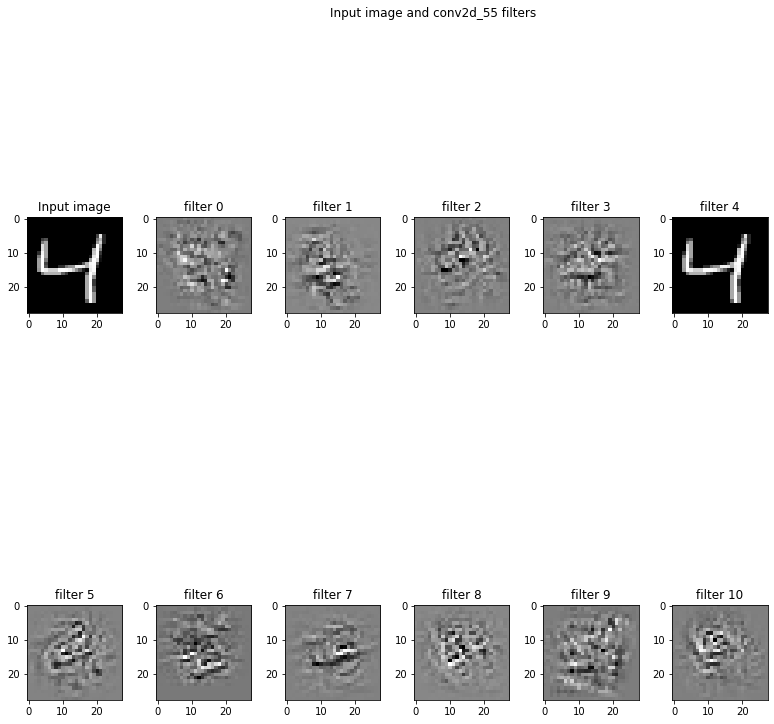

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_55'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()